In [1]:
import matplotlib.pyplot as plt
import numpy as np
from diffusionProcess import DiffusionProcess, drift, sigma, generate_linear_drift
from strategies import generate_reward_func
plt.style.use(r"C:\Users\razz_\AppData\Local\Programs\Python\Python310\Lib\site-packages\matplotlib\mpl-data\stylelib\theme_bw.mplstyle")

In [16]:
vals = np.linspace(0, 2, 200)

powers = [1, 2, 5]
a_values = [0.7, 0.9, 0.99]

payoffFuncs = [generate_reward_func(p, 0.9) for p in powers]

payoffs = [[g(v) for v in vals] for g in payoffFuncs]

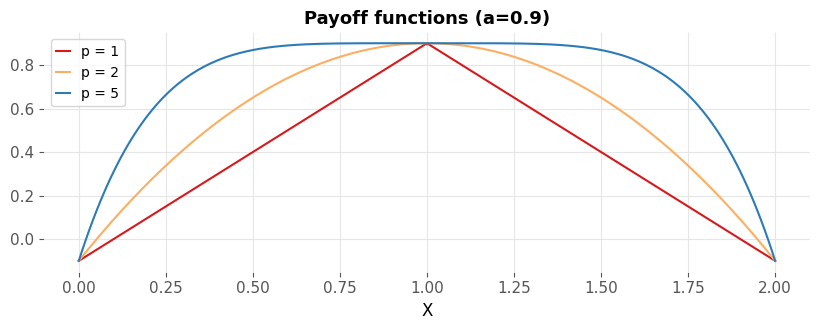

In [19]:
colors = ['#d7191c', '#fdae61', '#2c7bb6']

fig, ax = plt.subplots(1,1,figsize=(8.3, 3.4))
#fig.set_size_inches(11.69, 8.27)

for i, payoff in enumerate(payoffs):
    ax.plot(vals, payoff, label=f"p = {powers[i]}", color=colors[i])
ax.legend(loc="upper left", handlelength=1, handleheight=0.5)
ax.set_title("Payoff functions (a=0.9)", fontsize=13, fontweight="bold")
#ax[0].set_xlabel("X", fontsize=12)
ax.ticklabel_format(style="plain")
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
ax.set_xlabel("X")

plt.tight_layout()


plt.savefig(r'C:\Users\razz_\OneDrive - Aarhus Universitet\UNI\DataVidenskab\10. Semester\Images\DriftAndReward\Payoffa09.pdf')
plt.show()